In [1]:

import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)


![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* Objective is to understand and to arrive at the final data structure, which can be easily and rapidly accessed.
* Support each step by visual analytics

## Johns Hopkins GITHUB csv data

In [2]:
git_data_location_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_gitraw=pd.read_csv(git_data_location_path)

In [3]:
pd_gitraw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [4]:
#Since in the coloumns we have dates(in the header) as well as country/Region name.
#So this data in the above mentioned form is difficult to analyse. 
#Also pandas requires to specify date as a data type. 
#Hence we are simply extracting this data in a readable and analyzable form by using the code below.

In [5]:
time_index=pd_gitraw.columns[4:]

In [6]:
df_plot = pd.DataFrame({
    'date':time_index})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
list(pd_gitraw['Country/Region'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [8]:
pd_gitraw[pd_gitraw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4] # Summing up the data of each date

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [9]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
              'India'
             ] 

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_gitraw[pd_gitraw['Country/Region']==each].iloc[:,4::].sum(axis=0))

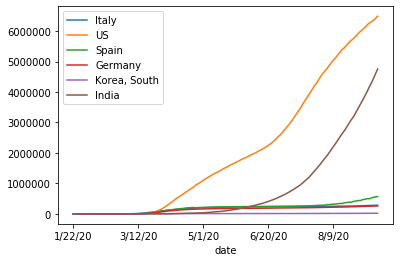

In [11]:
%matplotlib inline
df_plot.set_index('date').plot()

## Changing Data Type as 'Date'

In [12]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South",India
0,1/22/20,0,1,0,0,1,0
1,1/23/20,0,1,0,0,1,0
2,1/24/20,0,2,0,0,2,0
3,1/25/20,0,2,0,0,2,0
4,1/26/20,0,5,0,0,3,0


In [13]:
time_index=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_index] # convert back to date ISO norm (str)

In [14]:
df_plot['date']=time_index
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South",India
0,2020-01-22,0,1,0,0,1,0
1,2020-01-23,0,1,0,0,1,0
2,2020-01-24,0,2,0,0,2,0
3,2020-01-25,0,2,0,0,2,0
4,2020-01-26,0,5,0,0,3,0


In [16]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

# Creating a data frame for all countries.

In [17]:
git_data_location_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_gitraw=pd.read_csv(git_data_location_path) # Reading raw data and storing it in a data frame

In [18]:
pd_gitraw.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
256,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,340411,342351,344164,347152,350100,352560,355219,358138,361677,365174
257,NaN,Uruguay,-32.522800,-55.765800,0,0,0,0,0,0,...,1636,1653,1669,1679,1693,1712,1741,1759,1773,1780
258,NaN,Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,...,42688,42998,43293,43587,43893,44281,44930,45473,46160,46721
259,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,49877,50973,52165,53289,54350,55563,56751,57823,58663,59630
260,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1046,1049,1049,1049,1049,1054,1059,1059,1060,1060
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,24471,25142,25575,26127,26779,27363,27919,28664,29256,29906
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1979,1983,1983,1987,1989,1994,1999,2003,2007,2009
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12523,12639,12709,12776,12836,12952,13112,13214,13323,13466
265,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,6678,6837,6837,6837,7298,7388,7429,7453,7479,7508


In [19]:
time_index=pd_gitraw.columns[4:]

In [20]:
df_Allplot = pd.DataFrame({
    'date':time_index})
df_Allplot.head(10)

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
5,1/27/20
6,1/28/20
7,1/29/20
8,1/30/20
9,1/31/20


In [21]:
All_Country_List = list(pd_gitraw['Country/Region'].unique())

In [22]:
pd_gitraw[pd_gitraw['Country/Region']=='India'].iloc[:,4::].sum(axis=0)[25:50] # Summing up the data of each date

2/16/20     3
2/17/20     3
2/18/20     3
2/19/20     3
2/20/20     3
2/21/20     3
2/22/20     3
2/23/20     3
2/24/20     3
2/25/20     3
2/26/20     3
2/27/20     3
2/28/20     3
2/29/20     3
3/1/20      3
3/2/20      5
3/3/20      5
3/4/20     28
3/5/20     30
3/6/20     31
3/7/20     34
3/8/20     39
3/9/20     43
3/10/20    56
3/11/20    62
dtype: int64

In [23]:
for each in All_Country_List:
    df_Allplot[each]=np.array(pd_gitraw[pd_gitraw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [24]:
df_Allplot.tail()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
230,9/8/20,38520,10553,46938,1261,3033,95,500034,44953,26465,...,354932,1712,44281,55563,1054,27363,10,1994,12952,7388
231,9/9/20,38544,10704,47216,1301,3092,95,512293,45152,26524,...,357613,1741,44930,56751,1059,27919,10,1999,13112,7429
232,9/10/20,38572,10860,47488,1301,3217,95,524198,45326,26564,...,360544,1759,45473,57823,1059,28664,10,2003,13214,7453
233,9/11/20,38606,11021,47752,1344,3279,95,535705,45503,26607,...,364088,1773,46160,58663,1060,29256,10,2007,13323,7479
234,9/12/20,38641,11185,48007,1344,3335,95,546481,45675,26651,...,367592,1780,46721,59630,1060,29906,10,2009,13466,7508


## Changing Data Type as Date for all countries

In [25]:
df_Allplot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [26]:
time_index=[datetime.strptime( each,"%m/%d/%y") for each in df_Allplot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_index] # convert back to date ISO norm (str)

In [27]:
df_Allplot['date']=time_index
type(df_Allplot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
df_Allplot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [29]:
df_Allplot.to_csv('../data/processed/COVID_large_flat_table.csv',sep=';',index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)


A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [30]:
git_data_location_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_gitraw=pd.read_csv(git_data_location_path)


In [31]:
pd_gitraw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [32]:
# The date is Transaactional type of data which varies over a given point of time & 
# Latitude and Longitude is just the static information which doesn't vary over time period. 
# Hence in this part we will be Separating and eliminating the static data  

In [33]:
pd_data_base=pd_gitraw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [34]:
pd_data_base=pd_data_base.drop(['Lat','Long'], axis=1) # Eliminating Lat and Long columns using drop command
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,no,Albania,0,0,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,no,Algeria,0,0,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,no,Andorra,0,0,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,no,Angola,0,0,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [35]:
# We are now constructing a primary key with dates, states and country.
#.index - pushing states and countries in index
# T - exchanging rows and columns of the matrix by using Transpose (T)
# Stack - for staking multicolumns to the row base
# reseting the index

In [36]:
pd_data_base.set_index(['state','country'])


1/22/20  \
state                            country                                     
no                               Afghanistan                             0   
                                 Albania                                 0   
                                 Algeria                                 0   
                                 Andorra                                 0   
                                 Angola                                  0   
                                 Antigua and Barbuda                     0   
                                 Argentina                               0   
                                 Armenia                                 0   
Australian Capital Territory     Australia                               0   
New South Wales                  Australia                               0   
Northern Territory               Australia                               0   
Queensland                       Australia                               0   
South Australia                  Australia                               0   
Tasmania                         Australia                               0   
Victoria                         Australia                               0   
Western Australia                Australia                               0   
no                               Austria                                 0   
                                 Azerbaijan                              0   
                                 Bahamas                                 0   
                                 Bahrain                                 0   
                                 Bangladesh                              0   
                                 Barbados                                0   
                                 Belarus                                 0   
                                 Belgium                                 0   
                                 Belize                                  0   
                                 Benin                                   0   
                                 Bhutan                                  0   
                                 Bolivia                                 0   
                                 Bosnia and Herzegovina                  0   
                                 Botswana                                0   
                                 Brazil                                  0   
                                 Brunei                                  0   
                                 Bulgaria                                0   
                                 Burkina Faso                            0   
                                 Burma                                   0   
                                 Burundi                                 0   
                                 Cabo Verde                              0   
                                 Cambodia                                0   
                                 Cameroon                                0   
Alberta                          Canada                                  0   
British Columbia                 Canada                                  0   
Diamond Princess                 Canada                                  0   
Grand Princess                   Canada                                  0   
Manitoba                         Canada                                  0   
New Brunswick                    Canada                                  0   
Newfoundland and Labrador        Canada                                  0   
Northwest Territories            Canada                                  0   
Nova Scotia                      Canada                                  0   
Ontario                          Canada                                  0   
Prince Edward Island             Canada                                  0   
Quebec     

In [37]:
pd_relational_model=pd_data_base.set_index(['state','country']).T 

In [38]:
pd_relational_model

state            no                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
1/27/20           0       0       0       0      0                   0   
1/28/20           0       0       0       0      0                   0   
1/29/20           0       0       0       0      0                   0   
1/30/20           0       0       0       0      0                   0   
1/31/20           0       0       0       0      0                   0   
2/1/20            0       0       0       0      0                   0   
2/2/20            0       0       0       0      0                   0   
2/3/20            0       0       0       0      0                   0   
2/4/20            0       0       0       0      0                   0   
2/5/20            0       0       0       0      0                   0   
2/6/20            0       0       0       0      0                   0   
2/7/20            0       0       0       0      0                   0   
2/8/20            0       0       0       0      0                   0   
2/9/20            0       0       0       0      0                   0   
2/10/20           0       0       0       0      0                   0   
2/11/20           0       0       0       0      0                   0   
2/12/20           0       0       0       0      0                   0   
2/13/20           0       0       0       0      0                   0   
2/14/20           0       0       0       0      0                   0   
2/15/20           0       0       0       0      0                   0   
2/16/20           0       0       0       0      0                   0   
2/17/20           0       0       0       0      0                   0   
2/18/20           0       0       0       0      0                   0   
2/19/20           0       0       0       0      0                   0   
2/20/20           0       0       0       0      0                   0   
2/21/20           0       0       0       0      0                   0   
2/22/20           0       0       0       0      0                   0   
2/23/20           0       0       0       0      0                   0   
2/24/20           1       0       0       0      0                   0   
2/25/20           1       0       1       0      0                   0   
2/26/20           1       0       1       0      0                   0   
2/27/20           1       0       1       0      0                   0   
2/28/20           1       0       1       0      0                   0   
2/29/20           1       0       1       0      0                   0   
3/1/20            1       0       1       0      0                   0   
3/2/20            1       0       3       1      0                   0   
3/3/20            1       0       5       1      0                   0   
3/4/20            1       0      12       1      0                   0   
3/5/20            1       0      12       1      0                   0   
3/6/20            1       0      17       1      0                   0   
3/7/20            1       0      17       1      0                   0   
3/8/20            4       0      19       1      0                   0   
3/9/20            4       2      20       1      0                   0   
3/10/20           5      10      20       1      0                   0   
3/11/20           7      12      20       1      0                   0   
3/12/20           7      23      24       1      0                   0   
3/13/20           7      33      26       1      0                   1   
3/14

In [39]:
pd_relational_model=pd_data_base.set_index(['state','country']).T.stack(level=[0,1])

In [40]:
pd_relational_model

         state                         country           
1/22/20  Alberta                       Canada                    0.0
         Anguilla                      United Kingdom            0.0
         Anhui                         China                     1.0
         Aruba                         Netherlands               0.0
         Australian Capital Territory  Australia                 0.0
                                                              ...   
9/12/20  no                            West Bank and Gaza    29906.0
                                       Western Sahara           10.0
                                       Yemen                  2009.0
                                       Zambia                13466.0
                                       Zimbabwe               7508.0
Length: 62510, dtype: float64

In [41]:
pd_relational_model=pd_data_base.set_index(['state','country']).T.stack(level=[0,1]).reset_index()

In [42]:
pd_relational_model

,level_0,state,country,0
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0
...,...,...,...,...
62505,9/12/20,no,West Bank and Gaza,29906.0
62506,9/12/20,no,Western Sahara,10.0
62507,9/12/20,no,Yemen,2009.0
62508,9/12/20,no,Zambia,13466.0


In [43]:
pd_relational_model=pd_data_base.set_index(['state','country']).T.stack(level=[0,1]).reset_index().rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )

In [44]:
pd_relational_model

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0
...,...,...,...,...
62505,9/12/20,no,West Bank and Gaza,29906.0
62506,9/12/20,no,Western Sahara,10.0
62507,9/12/20,no,Yemen,2009.0
62508,9/12/20,no,Zambia,13466.0


In [45]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [46]:
pd_relational_model.dtypes #Type of date is string object

date          object
state         object
country       object
confirmed    float64
dtype: object

In [47]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]') # Coverting string object date into date object

In [48]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [49]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [50]:
print(pd_relational_model[pd_relational_model['country']=='India'].tail())

            date state country  confirmed
61337 2020-09-08    no   India    4370128
61603 2020-09-09    no   India    4465863
61869 2020-09-10    no   India    4562414
62135 2020-09-11    no   India    4659984
62401 2020-09-12    no   India    4754356


## Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [51]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1349,1355,1371,1377,1383,1385,1398,1413,1420,1432
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4495,4513,4542,4569,4586,4609,4639,4678,4722,4752
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,614,616,616,616,617,617,618,618,618,620
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,542,545,550,555,557,562,564,566,574,576
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1037,1049,1062,1065,1070,1071,1082,1099,1109,1114


In [52]:
# droping all non relevant fields! 
# Many of this fields do not belong to a transactional data.
#  These fields belong to so called master data/ Static data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [53]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [54]:
# updating the large relational file

In [55]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [56]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [57]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [58]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

             date    state country  confirmed
62275  2020-01-22  Alabama      US          0
62276  2020-01-22  Alabama      US          0
62277  2020-01-22  Alabama      US          0
62278  2020-01-22  Alabama      US          0
62279  2020-01-22  Alabama      US          0
...           ...      ...     ...        ...
847170 2020-09-12  Wyoming      US        465
847171 2020-09-12  Wyoming      US        310
847172 2020-09-12  Wyoming      US          0
847173 2020-09-12  Wyoming      US        111
847174 2020-09-12  Wyoming      US         23

[784900 rows x 4 columns]


### cross check on full sum US data

In [59]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [60]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
2020-01-27,US,5
2020-01-28,US,5
2020-01-29,US,5
2020-01-30,US,5
